<a href="https://colab.research.google.com/github/rdv0777/-Python-/blob/main/%D0%94%D0%97_%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Урок 4. Визуальный анализ данных

##Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


###1.1. Скачать следующие данные: kc-house-data и laptop_price

In [1]:
import pandas as pd

df = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/5394295/attachment/5a491f0a4b580a8b0e412adc3497d513.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###1.2. Изучите стоимости недвижимости

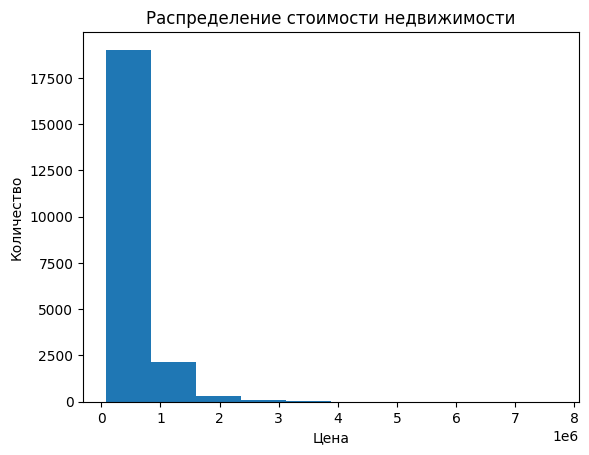

In [2]:
import matplotlib.pyplot as plt

plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

Вывод: Чем выше цена дома, тем меньше их колличество.

###1.3. Изучите распределение квадратуры жилой

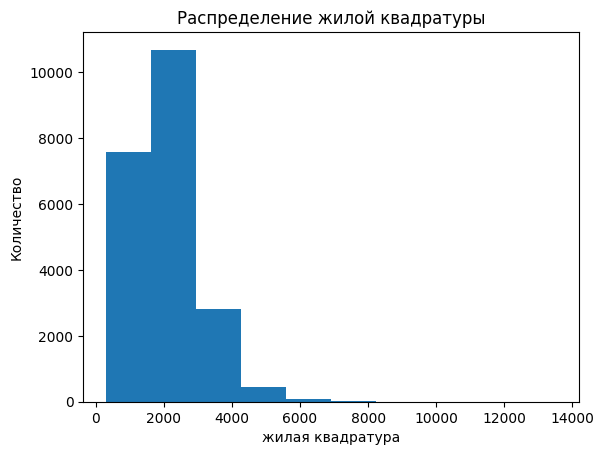

In [3]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой квадратуры')
plt.xlabel('жилая квадратура')
plt.ylabel('Количество');

Вывод: Основной массив жилой квадратуры находится до 2000, далее идёт резкое снижение количества.

###1.4. Изучите распределение года постройки

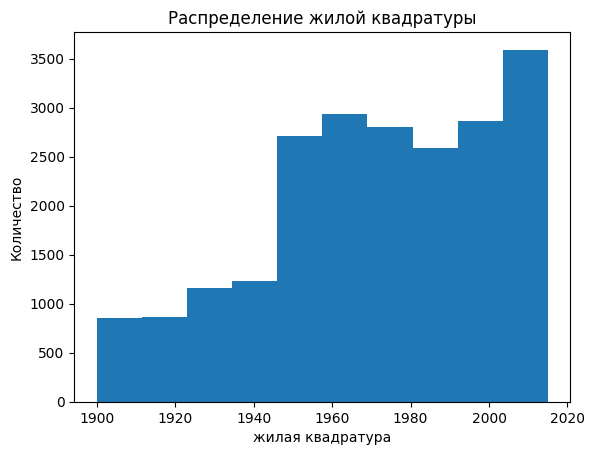

In [5]:
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('год постройки')
plt.ylabel('Количество');

Вывод: Основное колличество домов построено после 1950 года. В 2010-х годах темп строительства увеличился.

##Условие 2: 2 задача

###2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

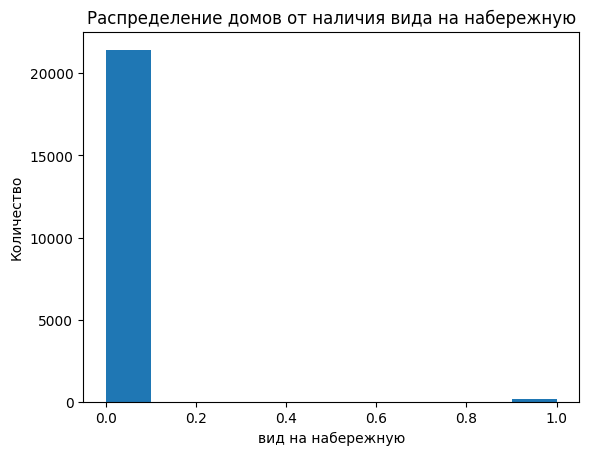

In [11]:
plt.hist(df['waterfront'])
plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('вид на набережную')
plt.ylabel('Количество');

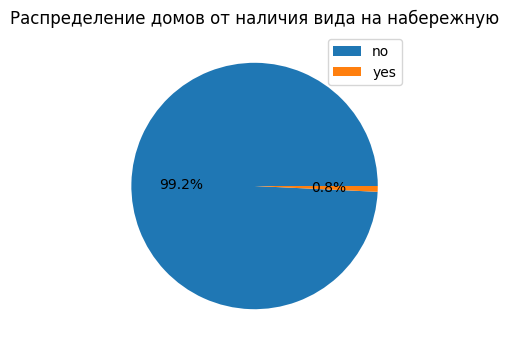

In [39]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.title('Распределение домов от наличия вида на набережную')
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

Вывод: Домов с видом на набережную 0,8% от общего колличества домов.

###2.2. Изучите распределение этажей домов

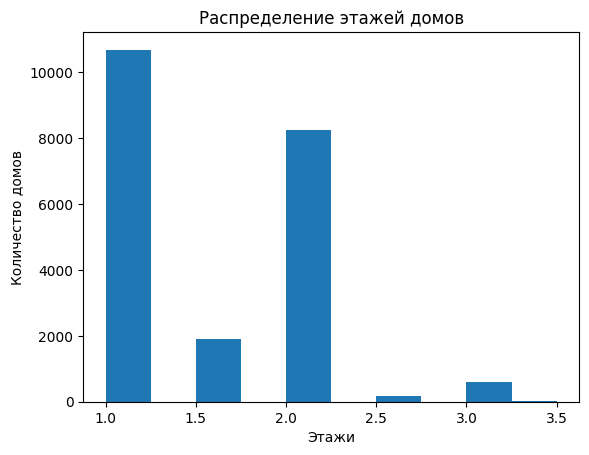

In [28]:
plt.hist(df['floors'])
plt.title('Распределение этажей домов')
plt.xlabel('Этажи')
plt.ylabel('Количество домов');

Вывод: Основное колличество домов с 1 и 2-мя этажами.

###2.3. Изучите распределение состояния домов

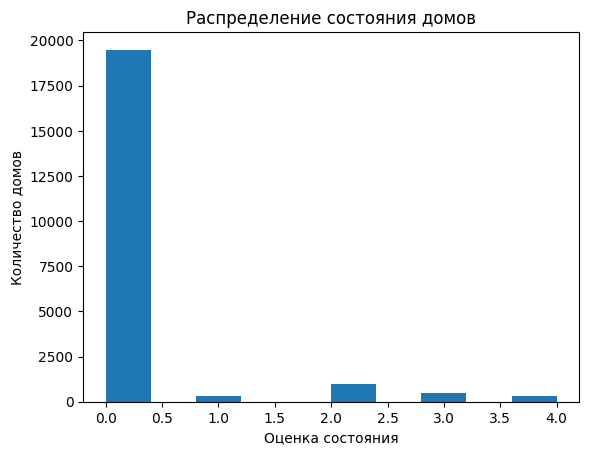

In [29]:
plt.hist(df['view'])
plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния')
plt.ylabel('Количество домов');

In [30]:
data = df['view'].value_counts()
data

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

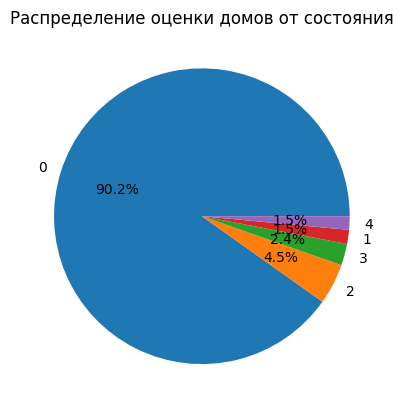

In [31]:
names = data.index
values = data.values
plt.title('Распределение оценки домов от состояния')
plt.pie(values, autopct='%.1f%%', labels=names);

Вывод: У 90% домов оценка состояния 0.

##Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [41]:
import seaborn as sns
import numpy as np

corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,-0.0,0.0,0.0,-0.0,-0.1,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.1
price,-0.0,1.0,0.3,0.5,0.7,0.1,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.1,0.1,-0.1,0.3,0.0,0.6,0.1
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.2,-0.0,0.1,0.0,0.4,0.5,0.3,0.2,0.0,-0.2,-0.0,0.1,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.1,0.5,0.1,0.2,-0.1,0.7,0.7,0.3,0.5,0.1,-0.2,0.0,0.2,0.6,0.1
sqft_living,-0.0,0.7,0.6,0.8,1.0,0.2,0.4,0.1,0.3,-0.1,0.8,0.9,0.4,0.3,0.1,-0.2,0.1,0.2,0.8,0.2
sqft_lot,-0.1,0.1,0.0,0.1,0.2,1.0,-0.0,0.0,0.1,-0.0,0.1,0.2,0.0,0.1,0.0,-0.1,-0.1,0.2,0.1,0.7
floors,0.0,0.3,0.2,0.5,0.4,-0.0,1.0,0.0,0.0,-0.3,0.5,0.5,-0.2,0.5,0.0,-0.1,0.0,0.1,0.3,-0.0
waterfront,-0.0,0.3,-0.0,0.1,0.1,0.0,0.0,1.0,0.4,0.0,0.1,0.1,0.1,-0.0,0.1,0.0,-0.0,-0.0,0.1,0.0
view,0.0,0.4,0.1,0.2,0.3,0.1,0.0,0.4,1.0,0.0,0.3,0.2,0.3,-0.1,0.1,0.1,0.0,-0.1,0.3,0.1
condition,-0.0,0.0,0.0,-0.1,-0.1,-0.0,-0.3,0.0,0.0,1.0,-0.1,-0.2,0.2,-0.4,-0.1,0.0,-0.0,-0.1,-0.1,-0.0


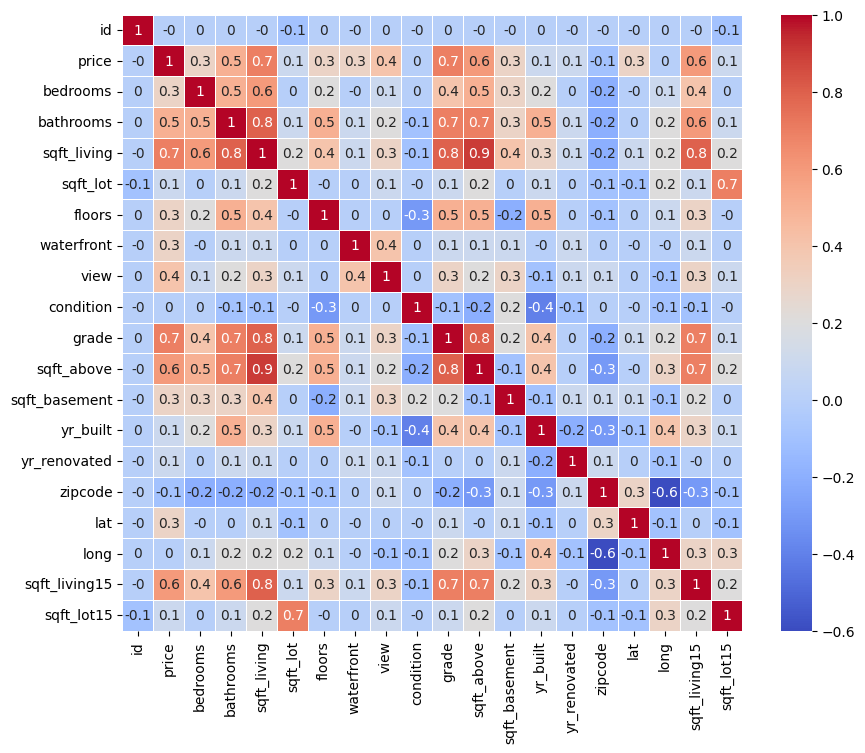

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

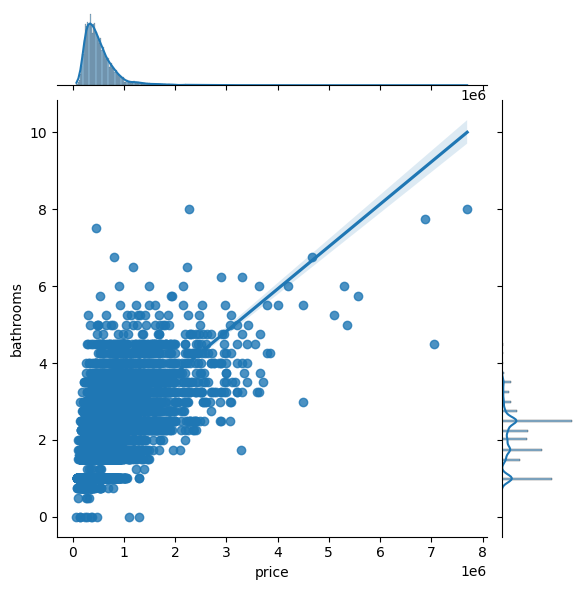

In [50]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg');

На стоимость жилого дома влияет колличество ванн в доме.

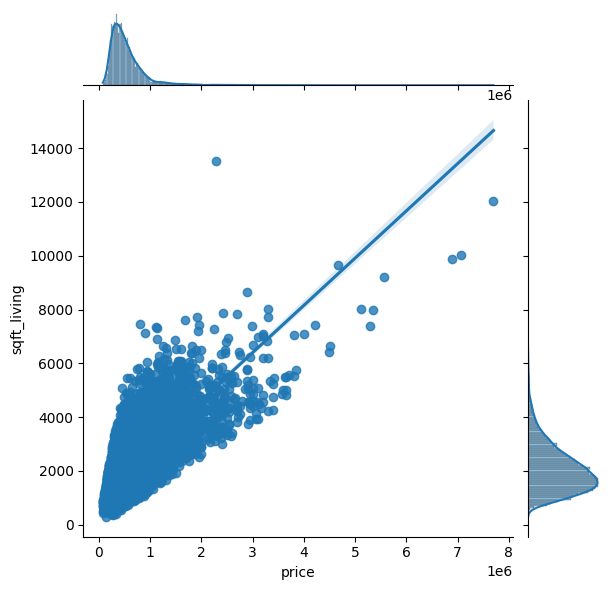

In [48]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

Так же, чем больше площадь дома, тем выше его стоимость.

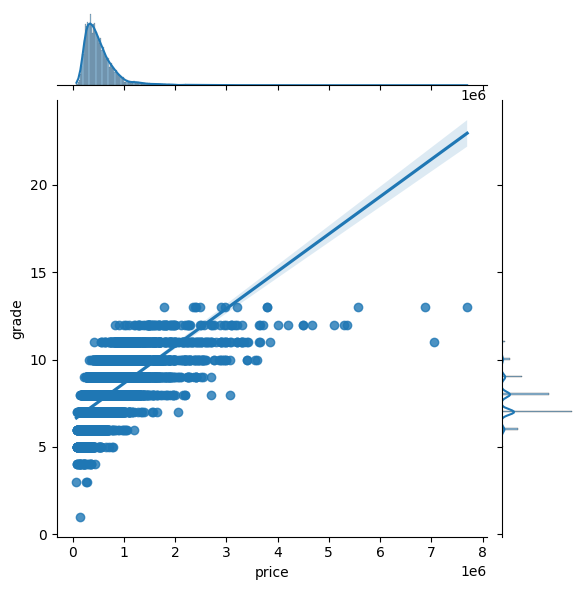

In [51]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

Стоимость дома повышается в зависимости от его класса, чем выше класс, тем больше его стоимость.

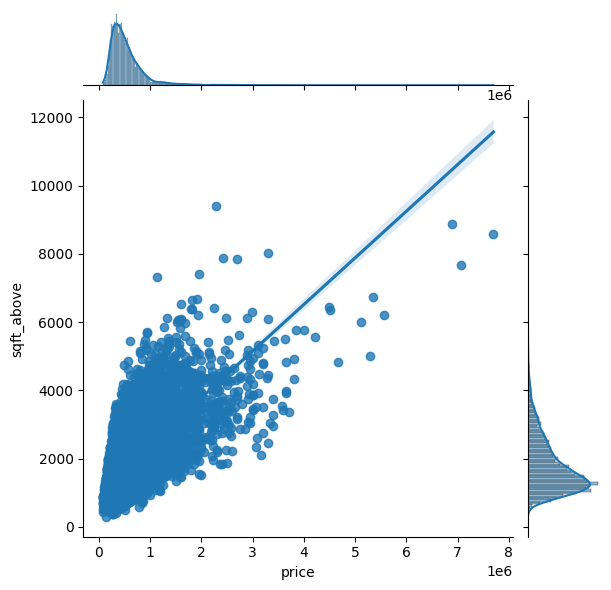

In [53]:
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg');

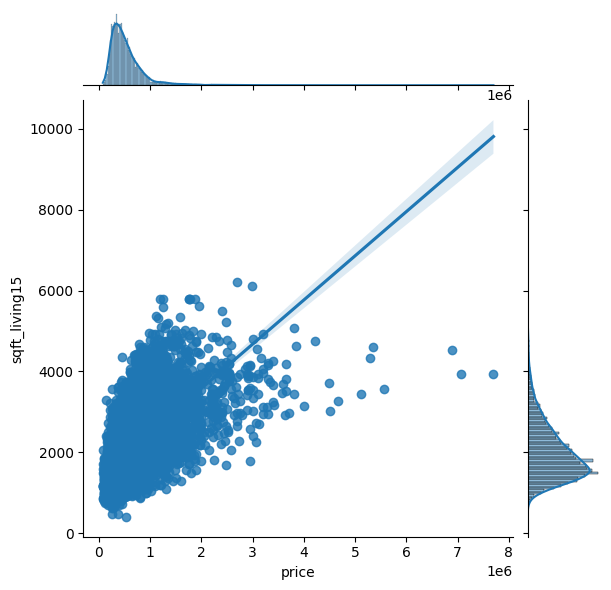

In [54]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg');